# Trans Effect Pancan Pearson Correlations 

This notebook graphs pearson correlations between EGFR proteomics and PLAU for supplemental figure

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u
import plot_utils as p

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load all cptac cancers
brain = cptac.Gbm()
ccrcc = cptac.Ccrcc()
en = cptac.Endometrial()
hnscc = cptac.Hnscc()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
Ovar = cptac.Ovarian()
Lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 5)


version 3scc v3.2.......                    


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 10)


In [3]:
def myTrunc(theNumber, theDigits):

    myDigits = 10 ** theDigits
    return (int(theNumber * myDigits) / myDigits)

In [4]:
def plot_pearson(df1,x_axis, y_axis, hue = "none", title = "", ra_stats = False, x_lab_corr = 2, y_lab_corr =2, show_plot = True, save_file_name = "file_name"):
    #format dfs 
    if hue != "none":   
        df1_subset = df1[[x_axis,y_axis,hue]]
        df1_subset = df1_subset.dropna(axis=0, how="any")

        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        corr, pval = scipy.stats.pearsonr(x1,y1)

        sns.set(style="darkgrid")
        plt.rcParams["figure.figsize"] = (30,22)
        graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, hue= hue, fit_reg=False)
        sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
        graph.set(title = title)
    if hue == "none":
        
        df1_subset = df1[[x_axis,y_axis]]
        df1_subset = df1_subset.dropna(axis=0, how="any")

        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        corr, pval = scipy.stats.pearsonr(x1,y1)

        sns.set(style="darkgrid")
        graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, fit_reg=False)
        sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
        plt.title(label = title, fontsize = 30)
        plt.xlabel(x_axis, fontsize=20)
        plt.ylabel(y_axis, fontsize=20)
        plt.xticks(fontsize = 17)
        plt.yticks(fontsize = 17)
    
    if ra_stats:
        pval = myTrunc(pval,8)
        corr = myTrunc(corr,3)
        plt.text(x_lab_corr,y_lab_corr, "Correlation: %s\nPvalue: %s"%(corr,pval), fontsize = 20)
        
    if save_file_name != "file_name":
        plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.savefig(save_file_name+'.png', dpi = 300)
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()

In [11]:
def print_stats(df1, x_axis, y_axis):
      
    df1_subset = df1[[x_axis,y_axis]]
    df1_subset = df1_subset.dropna(axis=0, how="any")
    count_row = df1_subset.shape[0]
    if count_row > 30:
        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        corr, pval = scipy.stats.pearsonr(x1,y1)
        print("Correlation: " + str(corr))
        print("P_value:" + str(pval))
       
    else: 
        return "Not Enough Data"

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


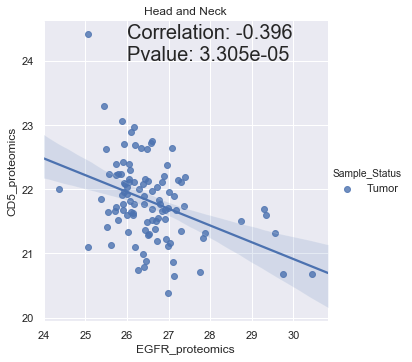

Correlation: -0.3969504486623524
P_value:3.3053843507110985e-05


In [41]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CD5","EGFR"])
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_pearson(df1,"EGFR_proteomics","CD5_proteomics", "Sample_Status", title = "Head and Neck", ra_stats = True,x_lab_corr = 26, y_lab_corr = 24, show_plot = True)
print_stats(df1,"EGFR_proteomics","CD5_proteomics")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


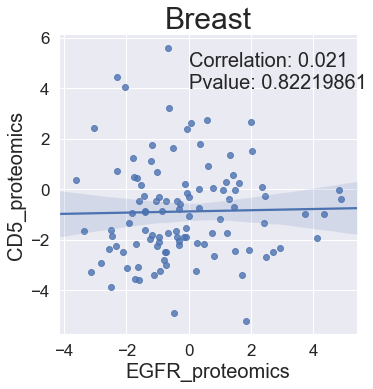

Correlation: 0.02197985513902552
P_value:0.8221986199341571


In [24]:
df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CD5","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_pearson(df1,"EGFR_proteomics","CD5_proteomics", "none", title = "Breast", ra_stats = True,x_lab_corr = 0, y_lab_corr = 4, show_plot = True)
print_stats(df1,"EGFR_proteomics","CD5_proteomics")

In [38]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CD5","EGFR"])
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

#plot_pearson(df1,"EGFR_proteomics","CD5_proteomics", "Sample_Status", title = "Glioblastoma", ra_stats = False, show_plot = True)
print_stats(df1,"EGFR_proteomics","CD5_proteomics")

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: CD5 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


'Not Enough Data'

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


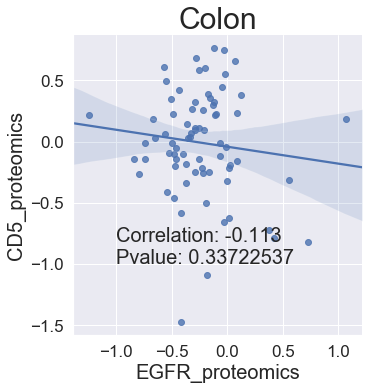

Correlation: -0.11312572963334157
P_value:0.3372253716588658


In [25]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CD5","EGFR"])

df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_pearson(df1,"EGFR_proteomics","CD5_proteomics", "none", title = "Colon", ra_stats = True, x_lab_corr = -1, y_lab_corr = -1,show_plot = True)
print_stats(df1,"EGFR_proteomics","CD5_proteomics")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 199 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


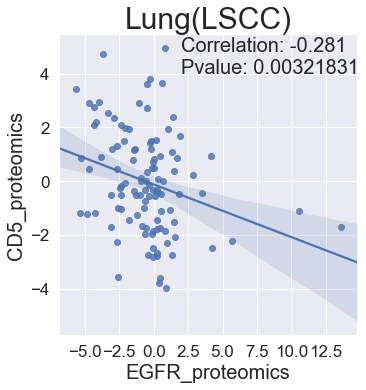

Correlation: -0.2810203850799495
P_value:0.003218317751688164


In [28]:
df1 = Lscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CD5","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_pearson(df1,"EGFR_proteomics","CD5_proteomics", "none", title = "Lung(LSCC)", ra_stats = True,x_lab_corr = 2, y_lab_corr = 4, show_plot = True)
print_stats(df1,"EGFR_proteomics","CD5_proteomics")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


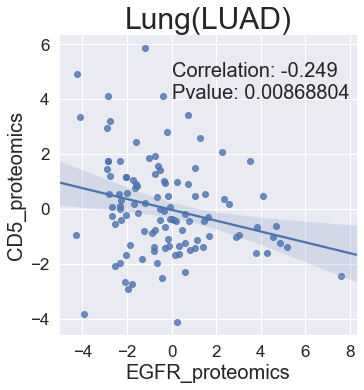

Correlation: -0.24908624367901344
P_value:0.008688044226432257


In [30]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CD5","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_pearson(df1,"EGFR_proteomics","CD5_proteomics", "none", title = "Lung(LUAD)", ra_stats = True,x_lab_corr = 0, y_lab_corr = 4, show_plot = True)
print_stats(df1,"EGFR_proteomics","CD5_proteomics")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


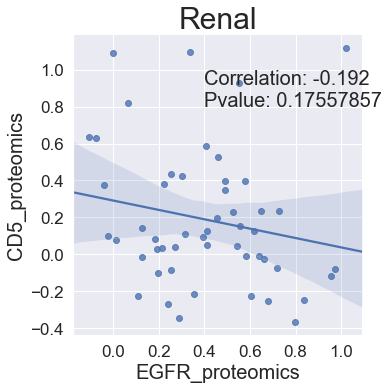

Correlation: -0.1926611108909176
P_value:0.17557857098488924


In [32]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CD5","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_pearson(df1,"EGFR_proteomics","CD5_proteomics", "none", title = "Renal", ra_stats = True,x_lab_corr = .4, y_lab_corr = .8, show_plot = True)
print_stats(df1,"EGFR_proteomics","CD5_proteomics")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 102 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


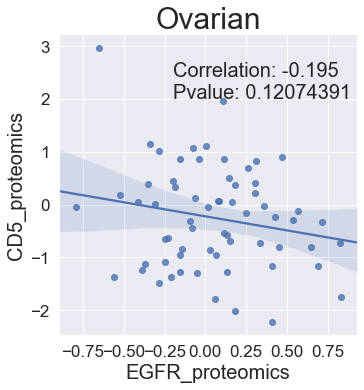

Correlation: -0.19593377527889402
P_value:0.12074391462703768


In [34]:
df1 = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CD5","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_pearson(df1,"EGFR_proteomics","CD5_proteomics", "none", title = "Ovarian", ra_stats = True,x_lab_corr = -.2, y_lab_corr = 2, show_plot = True)
print_stats(df1,"EGFR_proteomics","CD5_proteomics")